In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.linalg as la
import lusee
lusee.__path__

['/home/anze/work/lusee/luseepy/lusee']

## Loading

Let's load a set of files. These are 003 version of files.


In [2]:
root = '../003_Freq1-50MHz_Delta1MHz_AntennaLength6m_AntennaAngle30deg_LanderHeight2m/RadiatedElectricField_AntennaLength6m_AntennaAngle30deg_LanderHeight2m'
E = lusee.LBeam(root+'_Phase+0deg.fits')
Eo = lusee.LBeam(root+'_Phase+180deg.fits')
Eperp = lusee.LBeam(root+'_perpendicular_Phase+0deg.fits')
Emono = lusee.LBeam(root+'_monopole.fits')

## Are basic symmetris respected? At what level?

In [3]:
Er = E.rotate(180)
Ef = E.flip_over_yz()

In [4]:
# Change to look at a different frequency
freqndx=0

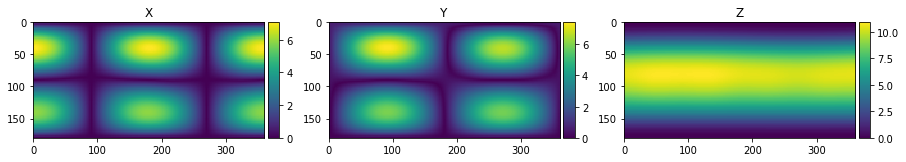

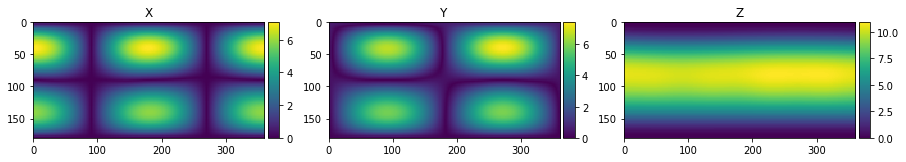

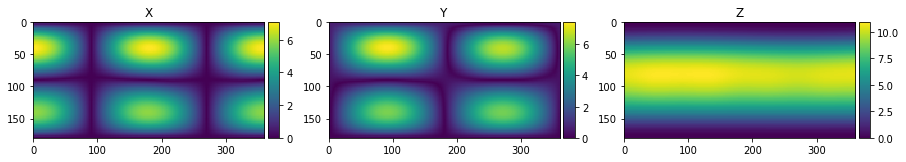

In [5]:
E.plotE(freqndx)
Er.plotE(freqndx)
Ef.plotE(freqndx)

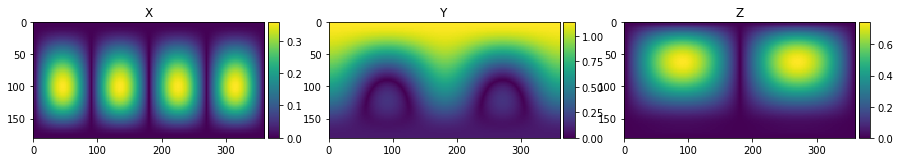

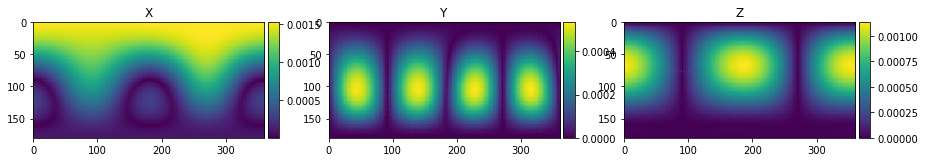

In [6]:
E.plotE(freqndx,Er.E-E.E)
E.plotE(freqndx,Ef.E-E.E)


## Reconstruct a single monopole output

In Kaja's notation, in phase and out of phase means 180 deg rotation. So adding and differencing them should result in invidiual atenna's E-field responses. I rotate -y antenna by 180 degrees to get two patterns that should be the same (by symmetry)

In [7]:
E1 = E.copy(E=(E.E+Eo.E)/2)
E2 = E.copy(E=(E.E-Eo.E)/2).rotate(180)

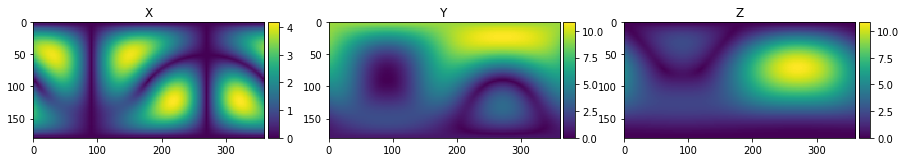

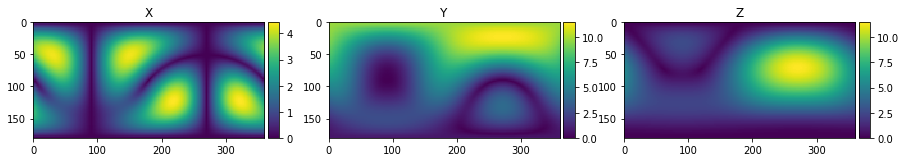

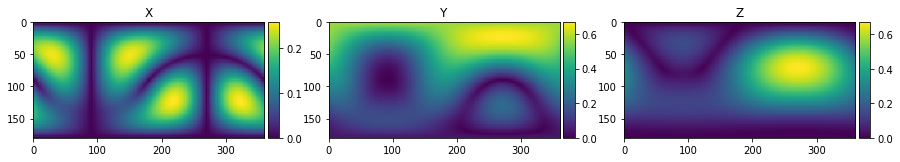

In [8]:
E1.plotE(freqndx)
E2.plotE(freqndx)
E.plotE(freqndx,E1.E-E2.E)

# How does this compare to the actual monopole?

Now that I have a solution for a single antenna, I go back and compare this to the monopole.

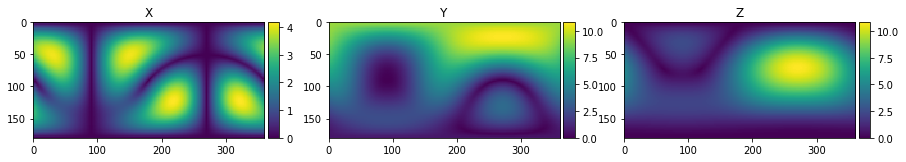

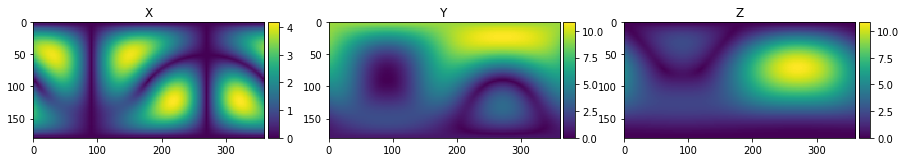

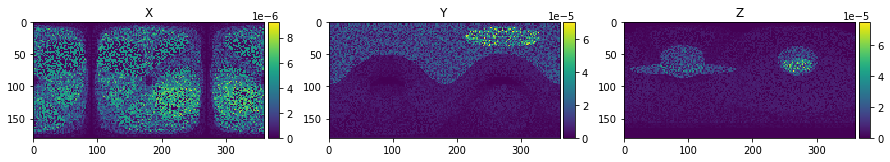

In [9]:
Emono.plotE(freqndx)
E1.plotE(freqndx)
E.plotE(freqndx,Emono.E-E1.E)

# What about perpendicular configuration?

Now that I have a solution for a single antenna, I can predict what perp configuration should look like

In [10]:
Eperpsim = E.copy(E=E1.E+E1.rotate(-90).E)

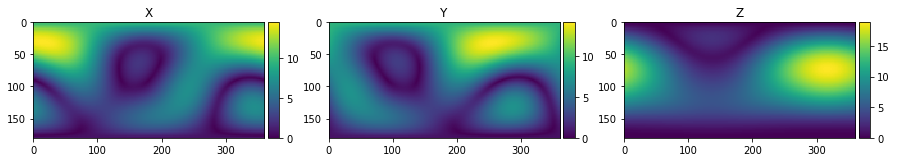

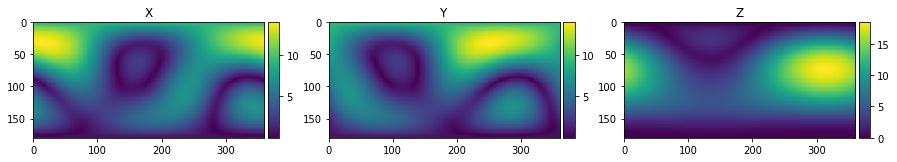

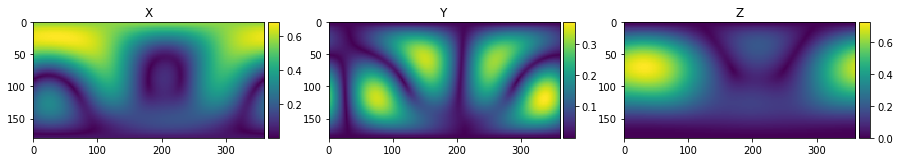

In [11]:
Eperp.plotE(freqndx)
Eperpsim.plotE(freqndx)
E.plotE(freqndx,Eperp.E-Eperpsim.E)

# Let's look at some eigenvalues across frequency

In [30]:
# Replace Emono with E, Eperp, etc
P_to_use = Emono.power()
# get power and flatten in theta, phi directions 
powr = P_to_use.reshape((E.Nfreq,-1))
# cov matrix
cov = np.cov(powr)
# eigenvalue decomposition
eva,eve = la.eig(cov)

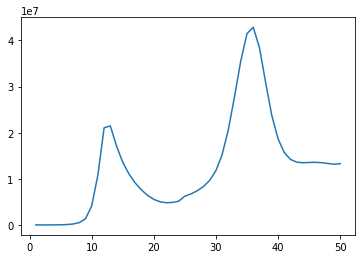

In [31]:
plt.plot(E.freq,powr.mean(axis=1))

/usr/local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(7.864417904639015e-06+0j)


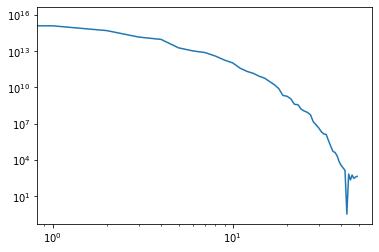

In [32]:
#eigenvalues
plt.plot(eva)
plt.loglog()
print(eva[15]/eva[0])

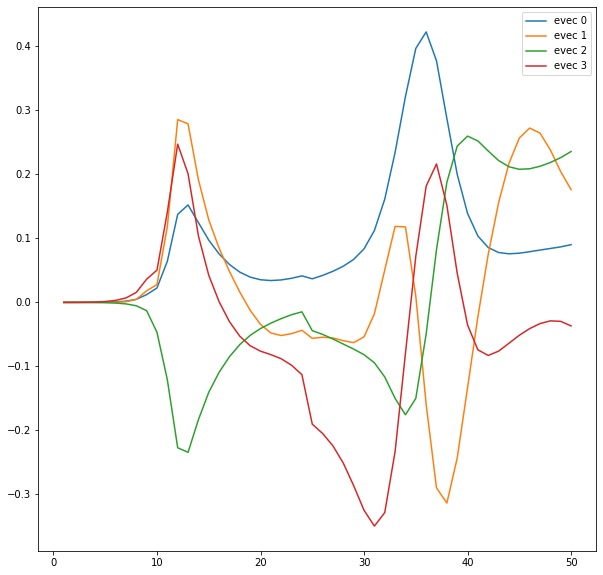

In [33]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.plot(E.freq,np.real(eve[:,i]), label=f'evec {i}')
plt.legend()
#plt.xlim(20,30)